<a href="https://colab.research.google.com/github/Manasa10-hub/image-classification/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Define paths to your .rar files in Google Drive
rar_path1 = "/content/drive/MyDrive/AiArtData.rar"  # Update with actual name
rar_path2 = "/content/drive/My Drive/RealArt.rar"  # Update with actual name

# Define extraction paths
extract_path1 = "/content/dataset1"
extract_path2 = "/content/dataset2"

# Extract first .rar file
!unrar x -o+ "{rar_path1}" "{extract_path1}/"

# Extract second .rar file
!unrar x -o+ "{rar_path2}" "{extract_path2}/"

# Verify extraction
print("Extracted files in dataset1:", os.listdir(extract_path1))
print("Extracted files in dataset2:", os.listdir(extract_path2))



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/AiArtData.rar

Creating    /content/dataset1                                         OK
Creating    /content/dataset1/AiArtData                               OK
Extracting  /content/dataset1/AiArtData/-how-important-people-from-the-past-really-looked-11-Pics-5ffd5c0f4d77f__880.jpg       0%  OK 
Extracting  /content/dataset1/AiArtData/-s-fluffy-fur-and-round-features-immediately-melted-the-viewer-s-heart-photo.jpg       0%  OK 
Extracting  /content/dataset1/AiArtData/-using-generative-ai-technology-landscape-pattern-abstract-concept-269270897.jpg       0%  OK 
Extracting  /content/dataset1/AiArtData/-yellow-kimono-with-a-golden-crown-and-a-very-detailed-Barn-owl-copy-800x800.jpg       0%  OK 
Extracting  /content/dataset1/AiArtData/.amazonaws.com2Fpublic2Fimages2Ff89de3bb-279b-42c9-9822-a653fb5b21e6_600x480.png       0%  OK 
Extr

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob


In [ ]:
import os

dataset1_path = extract_path1  # Update if needed
dataset2_path = extract_path2  # Update if needed

print("Dataset 1 Files:", os.listdir(dataset1_path))
print("Dataset 2 Files:", os.listdir(dataset2_path))


Dataset 1 Files: ['AiArtData']
Dataset 2 Files: ['RealArt']


In [ ]:
from glob import glob
import os

# Correct dataset paths
dataset1_path = "/content/dataset1/AiArtData"
dataset2_path = "/content/dataset2/RealArt"  # Updated path

# Find all images (JPG, JPEG, PNG)
valid_extensions = {".jpg", ".jpeg", ".png"}

dataset1_images = glob(os.path.join(dataset1_path, "*.*"))
dataset2_images = glob(os.path.join(dataset2_path, "*.*"))

# Filter only valid image formats
dataset1_images = [img for img in dataset1_images if os.path.splitext(img)[1].lower() in valid_extensions]
dataset2_images = [img for img in dataset2_images if os.path.splitext(img)[1].lower() in valid_extensions]

print(f"Dataset1 contains {len(dataset1_images)} images")
print(f"Dataset2 contains {len(dataset2_images)} images")


Dataset1 contains 535 images
Dataset2 contains 433 images


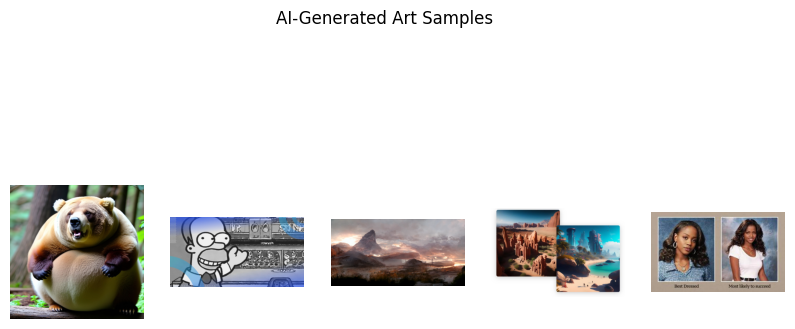

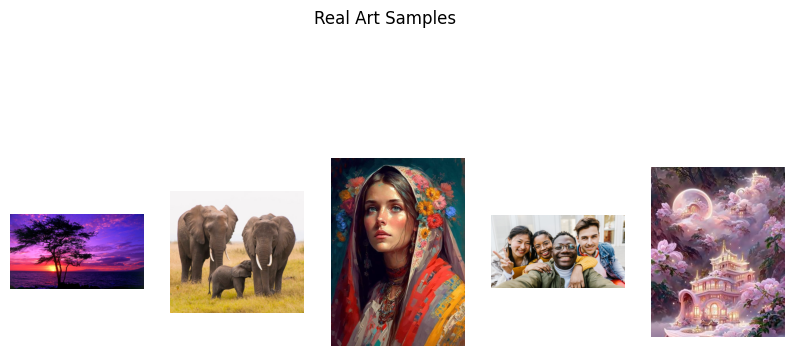

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_images(image_paths, title):
    plt.figure(figsize=(10, 5))
    for i, img_path in enumerate(image_paths[:5]):  # Show first 5 images
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(title)
    plt.show()

show_images(dataset1_images, "AI-Generated Art Samples")
show_images(dataset2_images, "Real Art Samples")


In [ ]:
import os
import shutil
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define dataset paths
ai_images = dataset1_images  # AI-generated images
real_images = dataset2_images  # Real images

# Define base directory for organized dataset
base_dir = "/content/dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

# Create directories
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(os.path.join(folder, "AI"), exist_ok=True)
    os.makedirs(os.path.join(folder, "Real"), exist_ok=True)

# Split data (80% Train, 10% Validation, 10% Test)
ai_train, ai_test = train_test_split(ai_images, test_size=0.2, random_state=42)
ai_val, ai_test = train_test_split(ai_test, test_size=0.5, random_state=42)

real_train, real_test = train_test_split(real_images, test_size=0.2, random_state=42)
real_val, real_test = train_test_split(real_test, test_size=0.5, random_state=42)

# Function to copy files
def copy_files(file_list, destination_folder):
    for file in file_list:
        shutil.copy(file, destination_folder)

# Move AI images
copy_files(ai_train, os.path.join(train_dir, "AI"))
copy_files(ai_val, os.path.join(val_dir, "AI"))
copy_files(ai_test, os.path.join(test_dir, "AI"))

# Move Real images
copy_files(real_train, os.path.join(train_dir, "Real"))
copy_files(real_val, os.path.join(val_dir, "Real"))
copy_files(real_test, os.path.join(test_dir, "Real"))

print("Dataset successfully organized!")


Dataset successfully organized!


In [ ]:
image_size = (224, 224) #size of the image according to the resnet
batch_size = 32 #no of images at a time
#with augumentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

#without augumentation
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images
train_generator = train_datagen.flow_from_directory(train_dir, target_size=image_size, batch_size=batch_size, class_mode="binary")
val_generator = val_datagen.flow_from_directory(val_dir, target_size=image_size, batch_size=batch_size, class_mode="binary")
test_generator = test_datagen.flow_from_directory(test_dir, target_size=image_size, batch_size=batch_size, class_mode="binary")

print("Data successfully loaded!")


Found 774 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Found 98 images belonging to 2 classes.
Data successfully loaded!


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0

# Load Pre-trained Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers
base_model.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification (AI vs. Real)

# Create final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[checkpoint, early_stopping]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/25 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.4916 - loss: 0.8891

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4946 - loss: 0.8594

25/25 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.4949 - loss: 0.8579 - val_accuracy: 0.5521 - val_loss: 0.6785
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.5099 - loss: 0.7553 - val_accuracy: 0.5521 - val_loss: 0.6898
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5249 - loss: 0.7660

25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5231 - loss: 0.7663 - val_accuracy: 0.5521 - val_loss: 0.6737
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5593 - loss: 0.7169

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5583 - loss: 0.7175 - val_accuracy: 0.5729 - val_loss: 0.6724
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5131 - loss: 0.7303 - val_accuracy: 0.5729 - val_loss: 0.6733
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5549 - loss: 0.6999

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5547 - loss: 0.7003 - val_accuracy: 0.5729 - val_loss: 0.6717
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 986ms/step - accuracy: 0.5158 - loss: 0.7262

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5156 - loss: 0.7262 - val_accuracy: 0.5833 - val_loss: 0.6687
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5302 - loss: 0.7172

25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5296 - loss: 0.7171 - val_accuracy: 0.5938 - val_loss: 0.6672
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5306 - loss: 0.7152 - val_accuracy: 0.6250 - val_loss: 0.6704
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5031 - loss: 0.7103 - val_accuracy: 0.5833 - val_loss: 0.6674
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5865 - loss: 0.6772 - val_accuracy: 0.5833 - val_loss: 0.6733
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4946 - loss: 0.7146 - val_accuracy: 0.5521 - val_loss: 0.6898
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.4988 - loss: 0.7332 - val_accuracy: 0.5625 - val_loss: 0.6779


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.5650 - loss: 0.6812
Test Accuracy: 57.14%


In [ ]:
# Unfreeze the last few layers of ResNet50
for layer in base_model.layers[-20:]:  # Unfreezing last 10 layers
    layer.trainable = True


In [ ]:
# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),  # Smaller LR for fine-tuning
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model again
fine_tune_epochs = 10  # Additional fine-tuning epochs

history_fine = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=fine_tune_epochs,
    callbacks=[checkpoint, early_stopping]  # Use callbacks for better training
)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5400 - loss: 0.7096 - val_accuracy: 0.6042 - val_loss: 0.6756
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.5436 - loss: 0.6828 - val_accuracy: 0.5104 - val_loss: 0.6907
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5620 - loss: 0.6763 - val_accuracy: 0.4792 - val_loss: 0.7006
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.5526 - loss: 0.6798 - val_accuracy: 0.4479 - val_loss: 0.7140
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5764 - loss: 0.6682 - val_accuracy: 0.4479 - val_loss: 0.7329
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6148 - loss: 0.6529 - val_accuracy: 0.4479 - val_loss: 0.7487


In [ ]:
# Evaluate the fine-tuned model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Fine-tuned Test Accuracy: {test_acc * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5195 - loss: 0.6869
Fine-tuned Test Accuracy: 53.06%


In [ ]:
train_acc = history_fine.history['accuracy'][-1]
val_acc = history_fine.history['val_accuracy'][-1]
print(f"Train Accuracy: {train_acc * 100:.2f}%, Validation Accuracy: {val_acc * 100:.2f}%")


Train Accuracy: 61.24%, Validation Accuracy: 44.79%


Saving 1a-1.jpeg to 1a-1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


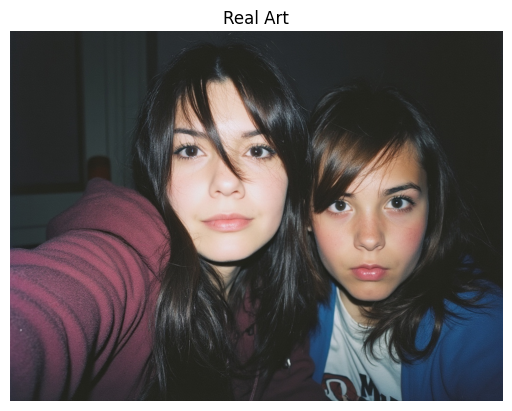

Prediction: Real Art


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Load the trained model
model_path = "/content/best_model.h5"  # Update if your model is in a different location
model = tf.keras.models.load_model(model_path)

# Function to preprocess image
def preprocess_image(image_path, target_size=(224, 224)):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, target_size)  # Resize to match model input
    img = img / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Expand dimensions to match batch format
    return img

# Function to predict AI-generated or Real
def predict_image(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)[0][0]  # Get the prediction value

    # Display the image
    plt.imshow(cv2.imread(image_path)[:, :, ::-1])  # Convert BGR to RGB
    plt.axis("off")
    plt.title("AI Generated" if prediction > 0.5 else "Real Art")
    plt.show()

    # Print prediction
    print("Prediction:", "AI Generated" if prediction > 0.5 else "Real Art")

# Upload and test an image
uploaded = files.upload()  # Upload image from your system

# Get the uploaded file name
image_path = list(uploaded.keys())[0]

# Predict the image
predict_image(image_path)
